# Taller evaluable sobre la extracción, transformación y visualización de datos usando IPython

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia 

# Instrucciones

En la carpeta 'Taller' del repositorio 'ETVL-IPython' se encuentran los archivos 'Precio_Bolsa_Nacional_($kwh)_'*'.xls' en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada resuelva los siguientes puntos usando el lenguaje de programación Python. 

# Preguntas

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Imprima el encabezamiento de la tabla usando `head()`. 

In [51]:
import pandas as pd

In [62]:
dframe=[]
for año in range(1995, 2018):
    nombrearchivo = 'Precio_Bolsa_Nacional_($kwh)_' + str(año)
    if año < 2000:
        skip = 3
    else:
        skip =2

    if año >= 2016:
        nombrearchivo += '.xls'
    else:
        nombrearchivo += '.xlsx'

    x = pd.read_excel(nombrearchivo, skiprows=skip, parse_cols=24)
    y = pd.melt(x, id_vars=['Fecha'], var_name='Hora', value_name='Precio')
    y['Fecha'] = pd.to_datetime(y['Fecha'])
    y['Hora'] = pd.to_numeric(y['Hora'])
    y['Tiempo'] = y['Fecha'] + pd.to_timedelta(y['Hora'], unit='h')
    dframe.append(y)

dframe=pd.concat(dframe)
dframe.sort_values('Tiempo', ascending=True, inplace=True)
dframe.set_index ('Tiempo', drop=True, inplace=True)
dframe.head()

,Fecha,Hora,Precio
Tiempo,,,
1995-07-20 00:00:00,1995-07-20,0,NaN
1995-07-20 01:00:00,1995-07-20,1,1.073
1995-07-20 02:00:00,1995-07-20,2,1.073
1995-07-20 03:00:00,1995-07-20,3,1.073
1995-07-20 04:00:00,1995-07-20,4,1.073


**IMPORTANTE:**
Por favor tener presente que la tabla de datos (dframe) se verticalizó, por lo tanto se tiene un mayor número de filas, pues la cantidad original de filas (que se asocian a cada día) se multiplicó por 24, que son las 24 horas de cada día.

**2.--** Compute e imprima el número de registros con datos faltantes.

In [63]:
dframe.isnull().sum() #encuentra los nulos y suma la cantidad de registros nulos

#Por favor tener presente que la tabla de datos (dframe) se verticalizó en el punto 1.
#Por lo anterior el número de registro con faltantes será mayor al que se obtiene con la tabla sin verticalizar

Fecha     216
Hora        0
Precio    238
dtype: int64

**3.--** Compute e imprima el número de registros duplicados.

In [64]:
len(dframe[dframe.duplicated()]) #me muestra los duplicados

#IMPORTANTE: Por favor tener presente que la tabla de datos (dframe) se verticalizó en el punto 1, por lo tanto se tiene un mayor número de filas, pues la cantidad original de filas (representadas por cada día) se multiplicó por las 24 horas.
#Por lo anterior el número de registro duplicados será mayor al que se obtiene con la tabla sin verticalizar

1951

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [65]:
dframe = dframe.drop_duplicates().dropna()  #elimina NaN y duplicados
len (dframe)

#Por favor tener presente que la tabla de datos (dframe) se verticalizó en el punto 1.
#Por lo anterior el número de registros será mayor al que se obtiene con la tabla sin verticalizar

189091

**5.--** Compute y grafique el precio primedio diario.

In [72]:
pb = dframe.drop(['Fecha','Hora'], axis=1)
pb['Año'] = pb.index.year
pb['Mes'] = pb.index.month
pb['Dia'] = pb.index.day
pb['Hora'] = pb.index.hour
pb['dia_semana'] = pb.index.weekday

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt

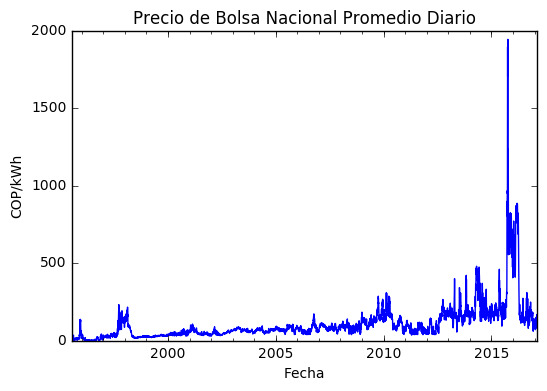

In [58]:
pb.groupby(pd.TimeGrouper('D'))['Precio'].mean().plot() #grafica el precio promedio diario
plt.ylabel('COP/kWh')
plt.xlabel('Fecha')
plt.title('Precio de Bolsa Nacional Promedio Diario')

**6.--** Compute y grafique el precio máximo por mes.

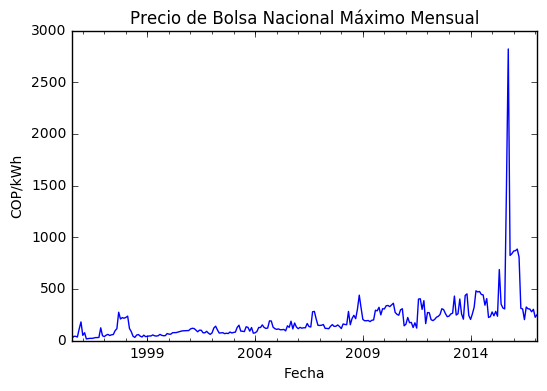

In [68]:
pb.groupby(pd.TimeGrouper('M'))['Precio'].max().plot() #grafica el precio máximo mensual
plt.ylabel('COP/kWh')
plt.xlabel('Fecha')
plt.title('Precio de Bolsa Nacional Máximo Mensual')

**7.--** Compute y grafique el precio mínimo mensual.

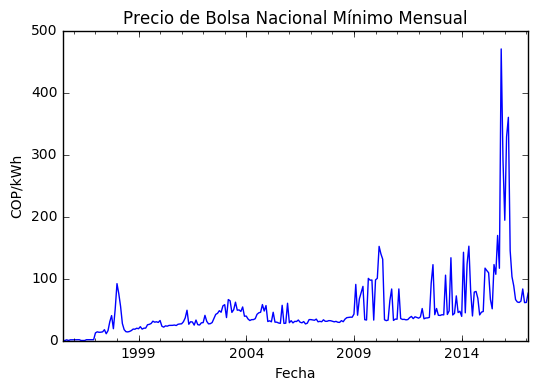

In [69]:
pb.groupby(pd.TimeGrouper('M'))['Precio'].min().plot() #grafica el precio mínimo mensual
plt.ylabel('COP/kWh')
plt.xlabel('Fecha')
plt.title('Precio de Bolsa Nacional Mínimo Mensual')

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

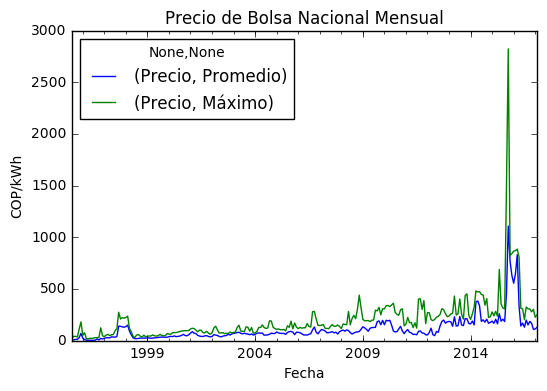

In [70]:
pb.groupby(pd.TimeGrouper('M')).agg({'Precio':{'Máximo':'max','Promedio':'mean'}}).plot()
# grafica el precio promedio y máximo mensual
plt.ylabel('COP/kWh')
plt.xlabel('Fecha')
plt.title('Precio de Bolsa Nacional Mensual')

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

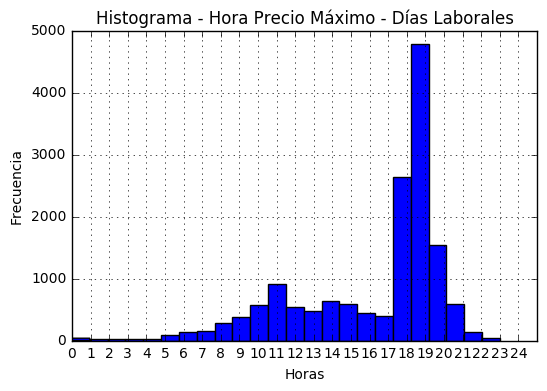

In [78]:
pbMaxDia = pb[pb.groupby(pd.TimeGrouper('D'))['Precio'].transform(max) == pb['Precio']]
#replica el precio máximo de cada día para todas las horas del día y evalua en que horas el precio es igual al precio máximo
pbMaxDia[pbMaxDia['dia_semana'].isin(range(0,5))].hist('Hora',bins=24)#seleccion de los dias laborales e histograma
plt.xticks(range(0, 25))
plt.ylabel('Frecuencia')
plt.xlabel('Horas')
plt.title('Histograma - Hora Precio Máximo - Días Laborales')
plt.show()

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

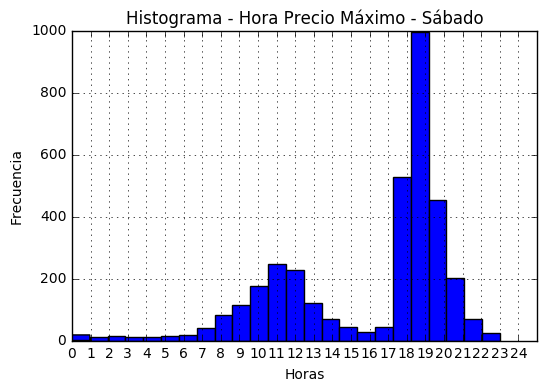

In [79]:
pbMaxDia = pb[pb.groupby(pd.TimeGrouper('D'))['Precio'].transform(max) == pb['Precio']]
pbMaxDia[pbMaxDia['dia_semana'].isin([5])].hist('Hora',bins=24)#seleccion del día sábado e histograma
plt.xticks(range(0, 25))
plt.ylabel('Frecuencia')
plt.xlabel('Horas')
plt.title('Histograma - Hora Precio Máximo - Sábado')
plt.show()

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

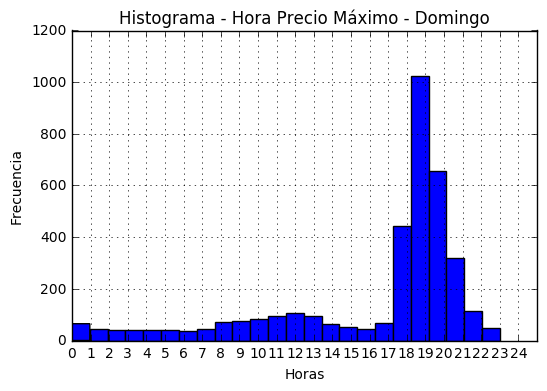

In [80]:
pbMaxDia = pb[pb.groupby(pd.TimeGrouper('D'))['Precio'].transform(max) == pb['Precio']]
pbMaxDia[pbMaxDia['dia_semana'].isin([6])].hist('Hora',bins=24)#seleccion del día domingo e histograma
plt.xticks(range(0, 25))
plt.ylabel('Frecuencia')
plt.xlabel('Horas')
plt.title('Histograma - Hora Precio Máximo - Domingo')
plt.show()

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [81]:
pbMinDia = pb.groupby('Año').min()['Precio']
pbMinDia

Año
1995     0.000000
1996     0.000000
1997    10.882310
1998    13.847330
1999    18.359530
2000    21.531167
2001    24.822879
2002    26.777682
2003    37.013438
2004    32.252998
2005    27.581415
2006    26.714797
2007    30.173824
2008    29.199135
2009    32.892503
2010    32.024957
2011    33.291100
2012    34.988099
2013    40.415346
2014    38.941951
2015    46.791501
2016    61.100689
2017    61.356315
Name: Precio, dtype: float64

In [82]:
pbMinDia = pb.groupby(pd.TimeGrouper('D')).min()
pbMinAño = pbMinDia[pbMinDia.groupby(pd.TimeGrouper('A'))['Precio'].transform(min) == pbMinDia['Precio']]
pbMinAño[['Precio']]

,Precio
Tiempo,
1995-07-26,0.000000
1995-07-28,0.000000
1995-07-29,0.000000
1995-07-30,0.000000
1995-07-31,0.000000
1995-08-01,0.000000
1995-10-13,0.000000
1996-05-10,0.000000
1996-06-30,0.000000


**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

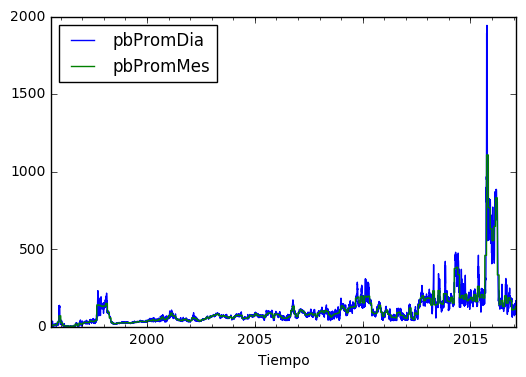

In [83]:
pbPromDia = pb.groupby(pd.TimeGrouper('D')).mean()
pbPromDia['pbPromMes'] = pbPromDia.groupby(pd.TimeGrouper('M'))['Precio'].transform('mean')
pbPromDia
pbPromDia.columns.values[0] = 'pbPromDia'
pbPromDia[['pbPromDia','pbPromMes']].plot()
plt.show()

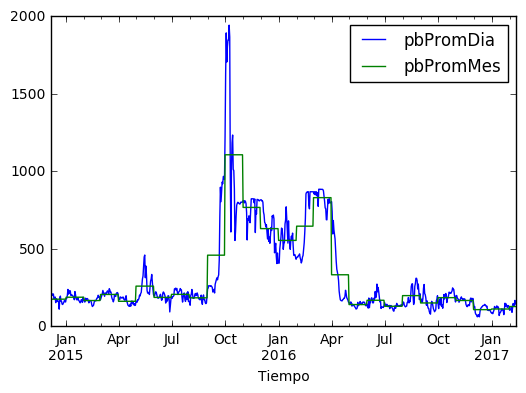

In [85]:
pbPromDia = pb.groupby(pd.TimeGrouper('D')).mean()
pbPromDia['pbPromMes'] = pbPromDia.groupby(pd.TimeGrouper('M'))['Precio'].transform('mean')
pbPromDia
pbPromDia.columns.values[0] = 'pbPromDia'
pbPromDia[['pbPromDia','pbPromMes']][-800:].plot() #aquí se hace un zoom de los últimos 800 datos
plt.show()

#este grafico se hace para que se aprecie el promedio mensual del precio de bolsa

---